In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# jax
import jax.numpy as jnp
from jax import random
import time

# collocation
import sys
import os
p_ = os.path.abspath(os.path.join('..', '00_utils'))
if p_ not in sys.path:
    sys.path.append(p_)
    
import collocation_obj
import importlib

In [2]:
def f(x):
    return x * np.sin(x)
    # return np.sin(x)

def df(x):
    return np.sin(x) + x*np.cos(x)
    # return np.cos(x)

eval_pt = np.linspace(0, 2*np.pi, 100)
f_values = f(eval_pt)
df_analytical = df(eval_pt)
df_numerical = np.gradient(f_values, eval_pt)
error = np.linalg.norm(df_analytical - df_numerical)

print("Maximum error:", np.max(error))

Maximum error: 0.09501322546375748


## Nodes

In [3]:
importlib.reload(collocation_obj)
Collocation = collocation_obj.Collocation

N = 50
a = 0
b = 10

collocation = Collocation(N, a, b, "chebyshev")
x_cheb = collocation.compute_nodes()
D_cheb = collocation.compute_derivative_matrix()

collocation = Collocation(N, a, b, "gauss_legendre")
x_gauss_legendre = collocation.compute_nodes()
D_gauss_legendre = collocation.compute_derivative_matrix()

collocation = Collocation(N, a, b, "gauss_radau")
x_gauss_radau = collocation.compute_nodes()
D_gauss_radau = collocation.compute_derivative_matrix()

collocation = Collocation(N, a, b, "gauss_lobatto")
x_gauss_lobatto = collocation.compute_nodes()
D_gauss_lobatto = collocation.compute_derivative_matrix()

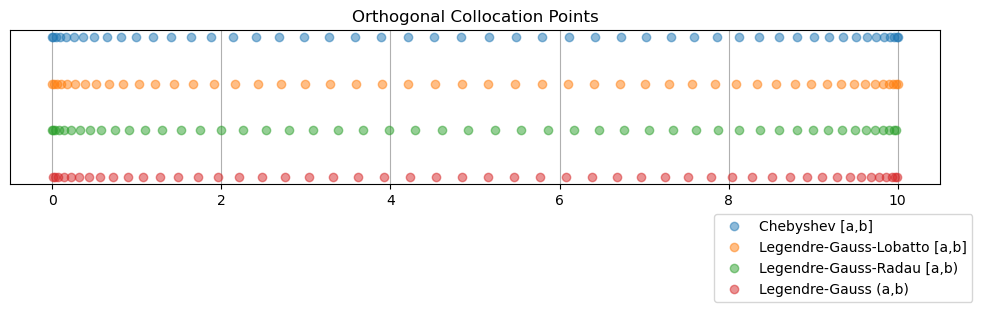

In [4]:
plt.figure(figsize=(12, 2))


#plt.plot(x_jacobi_2, np.ones_like(x_jacobi_2)*0.3, 'o', label=f'Jacobi', alpha = 0.5)

plt.plot(x_cheb, np.ones_like(x_cheb)*0.3, 'o', label=f'Chebyshev [a,b]', alpha = 0.5)
plt.plot(x_gauss_lobatto, np.ones_like(x_gauss_lobatto)*0.2, 'o', label=f'Legendre-Gauss-Lobatto [a,b]', alpha = 0.5)
plt.plot(x_gauss_radau, np.ones_like(x_gauss_radau)*0.1, 'o', label=f'Legendre-Gauss-Radau [a,b)', alpha = 0.5)
plt.plot(x_gauss_legendre, np.ones_like(x_gauss_legendre)*0.0, 'o', label=f'Legendre-Gauss (a,b)', alpha = 0.5)
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(0.75, -0.15))
plt.title("Orthogonal Collocation Points")
plt.yticks([])
plt.show();


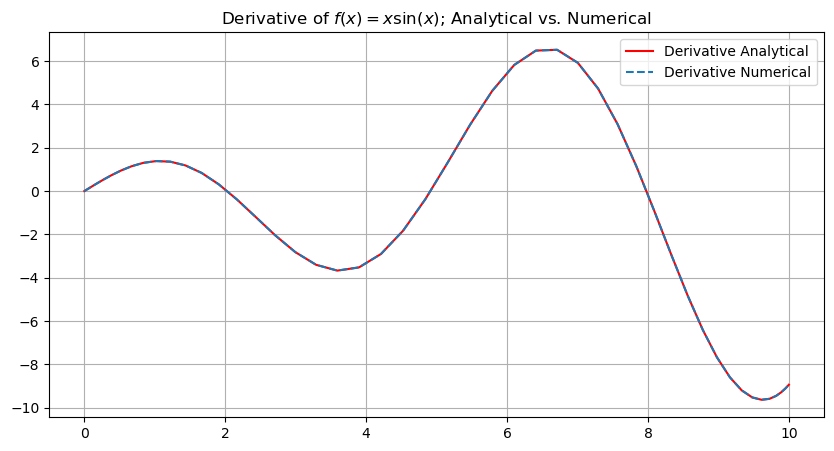

Maximum error: 8.819792499749572e-28


In [5]:
dy_dt_gauss_lobatto = []
for i in range(len(x_gauss_lobatto)):
    dy_dt_gauss_lobatto.append((D_gauss_lobatto[i] @ f(x_gauss_lobatto)).item())

dy_dt_gauss_lobatto = np.array(dy_dt_gauss_lobatto)

plt.figure(figsize=(10, 5))
plt.plot(x_gauss_lobatto, df(x_gauss_lobatto), color='red', label=f'Derivative Analytical')
plt.plot(x_gauss_lobatto, dy_dt_gauss_lobatto, '--', label=f'Derivative Numerical')
plt.title('Derivative of $f(x) = x \sin(x)$; Analytical vs. Numerical')
plt.grid()
plt.legend()
plt.show();

error = np.mean((df(x_gauss_lobatto) - dy_dt_gauss_lobatto)**2)

print("Maximum error:", np.max(error))

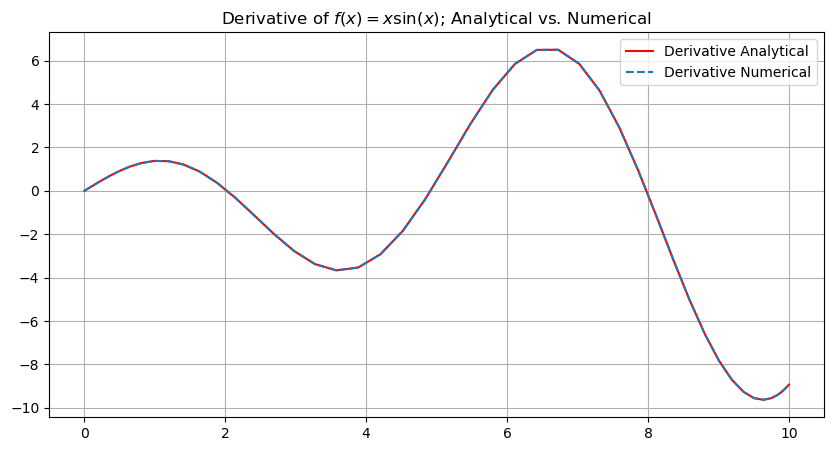

Maximum error: 1.603789700356444e-27


In [6]:
dy_dt_cheb = []
for i in range(len(x_cheb)):
    dy_dt_cheb.append((D_cheb[i] @ f(x_cheb)).item())

dy_dt_cheb = np.array(dy_dt_cheb)

plt.figure(figsize=(10, 5))
plt.plot(x_cheb, df(x_cheb), color='red', label=f'Derivative Analytical')
plt.plot(x_cheb, dy_dt_cheb, '--', label=f'Derivative Numerical')
plt.title('Derivative of $f(x) = x \sin(x)$; Analytical vs. Numerical')
plt.grid()
plt.legend()
plt.show();

error = np.mean((df(x_cheb) - dy_dt_cheb)**2)

print("Maximum error:", np.max(error))

---
### Compare 2 different implementations v1 and v2 of computing the derivative matrix

In [7]:
importlib.reload(collocation_obj)
Collocation = collocation_obj.Collocation

In [8]:
collocation = Collocation(200, a, b, "chebyshev")
x_cheb = collocation.compute_nodes()
D_cheb = collocation.compute_derivative_matrix()

In [9]:
D_cheb

Array([[-2.64010000e+03,  3.21000282e+03, -8.02550709e+02, ...,
         2.00049854e-01, -2.00012462e-01,  1.00000000e-01],
       [-8.02500706e+02,  4.01225351e+02,  5.35044919e+02, ...,
        -1.00031161e-01,  1.00012463e-01, -5.00031155e-02],
       [ 2.00637677e+02, -5.35044919e+02,  1.00293832e+02, ...,
         1.00049866e-01, -1.00031161e-01,  5.00124634e-02],
       ...,
       [-5.00124634e-02,  1.00031161e-01, -1.00049866e-01, ...,
        -1.00293832e+02,  5.35044919e+02, -2.00637677e+02],
       [ 5.00031155e-02, -1.00012463e-01,  1.00031161e-01, ...,
        -5.35044919e+02, -4.01225351e+02,  8.02500706e+02],
       [-1.00000000e-01,  2.00012462e-01, -2.00049854e-01, ...,
         8.02550709e+02, -3.21000282e+03,  2.64010000e+03]],      dtype=float64)

In [26]:
collocation = Collocation(200, a, b, "chebyshev_v2")
x_cheb_v2 = collocation.compute_nodes()
D_cheb_v2 = collocation.compute_derivative_matrix()

In [27]:
D_cheb_v2

Array([[-2.64010000e+03,  3.21000282e+03, -8.02550709e+02, ...,
         2.00049854e-01, -2.00012462e-01,  1.00000000e-01],
       [-8.02500706e+02,  4.01225351e+02,  5.35044919e+02, ...,
        -1.00031161e-01,  1.00012463e-01, -5.00031155e-02],
       [ 2.00637677e+02, -5.35044919e+02,  1.00293832e+02, ...,
         1.00049866e-01, -1.00031161e-01,  5.00124634e-02],
       ...,
       [-5.00124634e-02,  1.00031161e-01, -1.00049866e-01, ...,
        -1.00293832e+02,  5.35044919e+02, -2.00637677e+02],
       [ 5.00031155e-02, -1.00012463e-01,  1.00031161e-01, ...,
        -5.35044919e+02, -4.01225351e+02,  8.02500706e+02],
       [-1.00000000e-01,  2.00012462e-01, -2.00049854e-01, ...,
         8.02550709e+02, -3.21000282e+03,  2.64010000e+03]],      dtype=float64)

In [28]:
jnp.mean(D_cheb - D_cheb_v2)

Array(-2.4804811e-18, dtype=float64)

In [24]:
importlib.reload(collocation_obj)
Collocation = collocation_obj.Collocation

collocation = Collocation(200, a, b, "chebyshev")
x_cheb_v3 = collocation.compute_nodes()
D_cheb_v3 = collocation.compute_derivative_matrix()

In [25]:
jnp.mean(D_cheb_v3 - D_cheb)

Array(3.3913844e-18, dtype=float64)

In [29]:
jnp.mean(D_cheb_v3 - D_cheb_v2)

Array(9.10903297e-19, dtype=float64)